# Dask HDFS Parquet

- https://github.com/dask/dask-yarn

In [1]:
%matplotlib inline

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import dask
import dask.dataframe as dd
from dask.distributed import Client

HDFS_HOME = "hdfs://node-master:54310/user/hadoop"

for module in [pd, dask, np]:
    print(module.__name__, module.__version__)

pandas 1.0.5
dask 2.19.0
numpy 1.18.5


In [4]:
client = Client(memory_limit='14GB', processes=True)
client

Client Scheduler: tcp://127.0.0.1:33405 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 3 Cores: 6 Memory: 42.00 GB


In [9]:
%%time
filepath = HDFS_HOME + "/gdelt_500MB.snappy.parq"
df = dd.read_parquet(filepath)

CPU times: user 16.4 s, sys: 778 ms, total: 17.2 s
Wall time: 15.9 s


In [10]:
%%time
df.head()

CPU times: user 810 ms, sys: 131 ms, total: 941 ms
Wall time: 17.2 s


,event_id,date,event_date,event_code,event_base_code,event_root_code,lat,lon,geo_type,country_code,adm1_code,source_url,netloc
0,1,2013-02-03,1979-01-01,30,30,3,10.0000,8.0000,1,NI,NI,None,None
1,2,2013-02-03,1979-01-01,100,100,10,10.0000,8.0000,1,NI,NI,None,None
2,3,2013-02-03,1979-01-01,43,43,4,23.0036,106.3590,4,CH,CH16,None,None
3,4,2013-02-03,1979-01-01,190,190,19,32.7831,-96.8067,3,US,USTX,None,None
4,5,2013-02-03,1979-01-01,46,46,4,31.7444,34.6809,4,IS,IS01,None,None


In [14]:
df.dtypes

event_id                   object
date               datetime64[ns]
event_date         datetime64[ns]
event_code                float64
event_base_code           float64
event_root_code           float64
lat                       float64
lon                       float64
geo_type                  float64
country_code               object
adm1_code                  object
source_url                 object
netloc                     object
dtype: object

# Calculate Counts

In [11]:
%%time
df.shape[0].compute()

CPU times: user 52.7 s, sys: 6.65 s, total: 59.3 s
Wall time: 10min 23s


640389681

In [12]:
%%time
len(df)

CPU times: user 50.8 s, sys: 4.72 s, total: 55.5 s
Wall time: 8min 31s


640389681

In [13]:
%%time
len(df['event_id'])

CPU times: user 17.5 s, sys: 2.21 s, total: 19.7 s
Wall time: 2min 9s


640389681

# Most Common `event_root_code`

In [15]:
%%time
df['event_root_code'].value_counts().compute()

CPU times: user 4.78 s, sys: 379 ms, total: 5.16 s
Wall time: 13 s


4     161810583
1      91186748
5      50343855
3      47064431
2      45385155
19     41597232
11     40943344
17     30890694
8      23330016
7      21233148
12     16838770
6      14513080
9      12507727
18     10146874
13      9420267
10      8488917
14      6083109
16      6006285
15      2331574
20       267872
Name: event_root_code, dtype: int64

# Most Common `netloc`

In [24]:
%%time
df['netloc'].value_counts().compute().head(20)

CPU times: user 8.47 s, sys: 907 ms, total: 9.38 s
Wall time: 52.3 s


www.dailymail.co.uk            3961657
                               3603963
www.msn.com                    3374323
allafrica.com                  3185057
www.business-standard.com      1854742
www.washingtonpost.com         1795871
www.theguardian.com            1619331
www.thenews.com.pk             1609585
timesofindia.indiatimes.com    1564965
www.reuters.com                1317667
news.yahoo.com                 1270725
www.thehindu.com               1221602
www.sfgate.com                 1217931
www.4-traders.com              1195832
www.yahoo.com                  1166510
www.nytimes.com                1084120
indianexpress.com              1066858
www.dawn.com                   1055886
sputniknews.com                1052059
www.cbc.ca                     1021724
Name: netloc, dtype: int64

# Number of NaN per Column

In [16]:
%%time
df.isna().sum().compute()

CPU times: user 55.2 s, sys: 6.16 s, total: 1min 1s
Wall time: 9min 5s


event_id                   0
date                       0
event_date                 0
event_code                 0
event_base_code            0
event_root_code            0
lat                        0
lon                        0
geo_type                   0
country_code          126031
adm1_code             126031
source_url         207800680
netloc             207800680
dtype: int64

In [20]:
%%time
df['event_date'].min().compute()

CPU times: user 6.57 s, sys: 696 ms, total: 7.26 s
Wall time: 31.3 s


datetime.date(1979, 1, 1)

In [21]:
%%time
df['date'].min().compute()

CPU times: user 6.14 s, sys: 594 ms, total: 6.73 s
Wall time: 31.5 s


datetime.date(2013, 2, 3)

# Full GDELT Data Set

In [26]:
%%time
df_headers = pd.read_excel('data/CSV.header.fieldids.xlsx')
columns = df_headers.columns.values
FILEPATH = "processed_data/gdelt.snappy.parq/"
df = dd.read_parquet(FILEPATH, sep='\t', names=columns, dtype='str')

CPU times: user 1min 47s, sys: 12.9 s, total: 2min
Wall time: 1min 53s


In [28]:
%%time
df_na = df.isna().sum().compute()
df_na

CPU times: user 11min 37s, sys: 45.7 s, total: 12min 22s
Wall time: 53min 6s


GLOBALEVENTID                    0
SQLDATE                          0
MonthYear                        2
Year                             2
FractionDate                     0
Actor1Code                59289286
Actor1Name                59288453
Actor1CountryCode        269443372
Actor1KnownGroupCode     624457810
Actor1EthnicCode         630318058
Actor1Religion1Code      624180455
Actor1Religion2Code      631803830
Actor1Type1Code          360460814
Actor1Type2Code          615220456
Actor1Type3Code          633649374
Actor2Code               163731995
Actor2Name               166884120
Actor2CountryCode        338490456
Actor2KnownGroupCode     625795389
Actor2EthnicCode         630940177
Actor2Religion1Code      624563644
Actor2Religion2Code      632084016
Actor2Type1Code          412705482
Actor2Type2Code          620190161
Actor2Type3Code          633867663
IsRootEvent                      0
EventCode                        3
EventBaseCode                    3
EventRootCode       

In [29]:
%%time
num_rows = len(df['GLOBALEVENTID'])

CPU times: user 1min 50s, sys: 8.27 s, total: 1min 58s
Wall time: 5min 39s


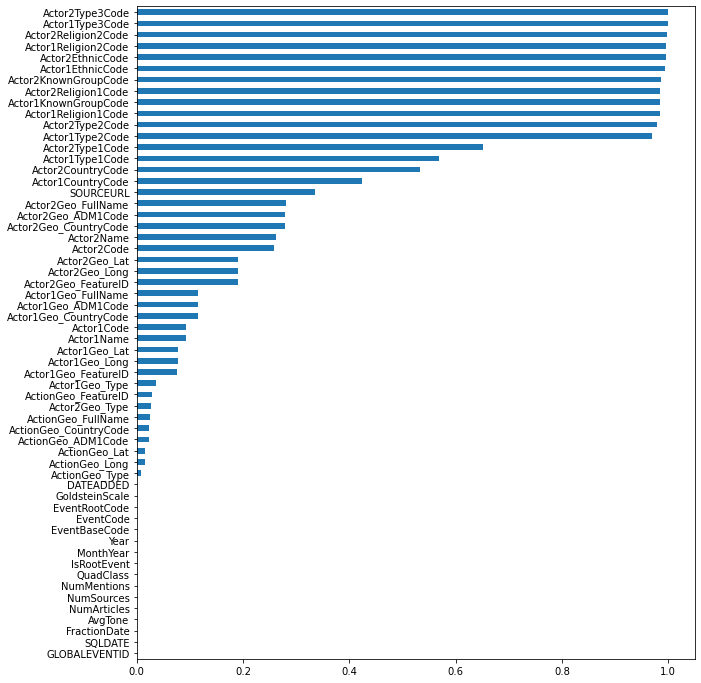

In [37]:
(df_na / num_rows).sort_values(ascending=True).plot(kind='barh', figsize=(10, 12));